## New research question: How does the frequency of AI tool usage at work vary across businesses of different sizes?

In [25]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from matplotlib import lines

### Calling dataset and basic EDA

Display columns in dataset

In [26]:
# Display all columns 
pd.set_option('display.max_columns', None)

# Display full header 
pd.set_option('display.max_colwidth', 150)
df = pd.read_csv('dataset.csv')

print(df.head(1))

    StartDate   EndDate         Status   IPAddress  Progress  \
0  Start Date  End Date  Response Type  IP Address  Progress   

   Duration (in seconds)  Finished   RecordedDate   ResponseId  \
0  Duration (in seconds)  Finished  Recorded Date  Response ID   

     RecipientLastName    RecipientFirstName   RecipientEmail  \
0  Recipient Last Name  Recipient First Name  Recipient Email   

         ExternalReference   LocationLatitude   LocationLongitude  \
0  External Data Reference  Location Latitude  Location Longitude   

    DistributionChannel   UserLanguage  \
0  Distribution Channel  User Language   

                                                                                                     Q2  \
0  I have read and understood the information above and I agree to voluntary participate in this study.   

                                           Prolific-ID  \
0  What is your Prolific ID? Note: it should auto-fill   

                                                   

Select relevant columns and rename them for easier use 

Adding the new data onto the previous dataset

In [27]:
# Drop the first row 
df = df.iloc[1:, :]

# Drop rows containing `{"ImportId"` strings, indicating metadata or placeholders
df = df[~df.apply(lambda row: row.astype(str).str.contains('ImportId').any(), axis=1)]

# Reset index after row removal
df.reset_index(drop=True, inplace=True)

# Import new df and concat it to the previous one 
new_df = pd.read_csv("/Users/celinewu/Documents/Y2A_Data_Analysis/cleaned_dataset.csv")

df = pd.concat([df, new_df], ignore_index=True)

# Relevant columns for analysis
columns_of_interest = [ 'Q30', 'Q8',]

# Create DataFrame with these columns
df_analysis = df[columns_of_interest]

# Rename columns 
df_analysis.columns = [
    'Company_Size', 
    'AI_Usage_Work'
]

# Display final dataset
print(df_analysis.head(10))

              Company_Size                                 AI_Usage_Work
0   Fewer than 5 employees  Yes, I have used them occasionally for work.
1  More than 250 employees                                        Rarely
2  More than 250 employees  Yes, I have used them occasionally for work.
3         50-100 employees        Yes, I use them regularly for my work.
4  More than 250 employees                No, I do not use them at work.
5          10-49 employees        Yes, I use them regularly for my work.
6  More than 250 employees  Yes, I have used them occasionally for work.
7  More than 250 employees                No, I do not use them at work.
8            I do not know        Yes, I use them regularly for my work.
9        101-250 employees  Yes, I have used them occasionally for work.


Unique values in chosen columns 

In [28]:
for column in df_analysis.columns:
    unique_counts = df_analysis[column].value_counts()
    print(unique_counts)
    print("\n")

Company_Size
10-49 employees            55
50-100 employees           49
More than 250 employees    26
101-250 employees          23
Fewer than 10 employees    17
Fewer than 5 employees      9
1 employee                  6
I do not know               5
Name: count, dtype: int64


AI_Usage_Work
Yes, I have used them occasionally for work.    69
Yes, I use them regularly for my work.          49
No, I do not use them at work.                  37
Rarely                                          35
Name: count, dtype: int64




Missing values

In [29]:
# Display missing values
missing_rows = df_analysis[df_analysis.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_rows)


Rows with missing values:
    Company_Size AI_Usage_Work
33           NaN           NaN
191          NaN           NaN
192          NaN           NaN
193          NaN           NaN
194          NaN           NaN


Drop rows with missing values 

In [30]:
# Drop rows where any column contains the value 'I do not know'
df_analysis = df_analysis[(df_analysis != 'I do not know').all(axis=1)]

# Drop rows with missing values (NaN)
df_analysis.dropna(inplace=True)

# Check for remaining rows with missing values or 'I do not know'
missing_or_unknown_rows = df_analysis[(df_analysis.isnull().any(axis=1)) | (df_analysis == 'I do not know').any(axis=1)]

print("Rows with missing or 'I do not know' values after dropping:")
print(missing_or_unknown_rows)


Rows with missing or 'I do not know' values after dropping:
Empty DataFrame
Columns: [Company_Size, AI_Usage_Work]
Index: []


Plotting the data

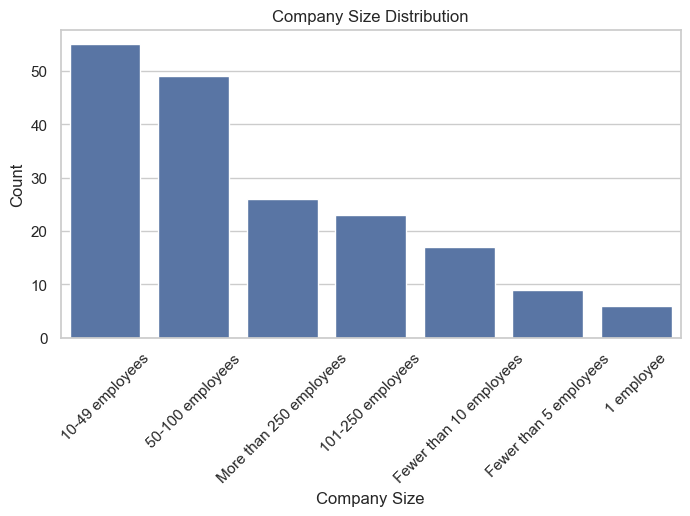

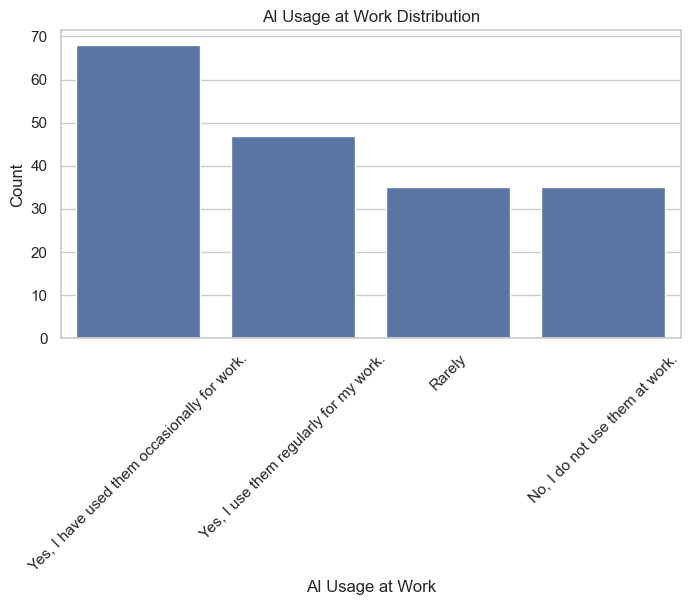

In [31]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot Company Size
plt.figure(figsize=(8, 4))
sns.countplot(data=df_analysis, x='Company_Size', order=df_analysis['Company_Size'].value_counts().index)
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot AI Usage at Work
plt.figure(figsize=(8, 4))
sns.countplot(data=df_analysis, x='AI_Usage_Work', order=df_analysis['AI_Usage_Work'].value_counts().index)
plt.title('AI Usage at Work Distribution')
plt.xlabel('AI Usage at Work')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Replacing the categorical values with numerical values

SME categorizes small businesses as companies with 1-49 employees, medium businesses have between 50-250 employees, and large businesses have 250+ employees. 

In [32]:
company_size_category = {
    'Fewer than 5 employees': 1,
    'Fewer than 10 employees': 1,
    '10-49 employees': 1,
    '50-100 employees': 2,
    '101-250 employees': 2,
    'More than 250 employees': 3,
    '1 employee': 1,
    'I do not know': 0  # or exclude this row from your analysis
}

ai_usage = {
    'No, I do not use them at work.': 1,
    'Rarely': 2,
    'Yes, I have used them occasionally for work.': 3,
    'Yes, I use them regularly for my work.': 4
}

df_analysis['Company_Size'] = df_analysis['Company_Size'].replace(company_size_category)
df_analysis['AI_Usage_Work'] = df_analysis['AI_Usage_Work'].replace(ai_usage)

# Check the updated DataFrame
print(df_analysis.head())

   Company_Size  AI_Usage_Work
0             1              3
1             3              2
2             3              3
3             2              4
4             3              1


/var/folders/kz/slhyr0gd4qj4nrryyswvqv4c0000gn/T/ipykernel_16207/827742772.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_analysis['Company_Size'] = df_analysis['Company_Size'].replace(company_size_category)
/var/folders/kz/slhyr0gd4qj4nrryyswvqv4c0000gn/T/ipykernel_16207/827742772.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_analysis['AI_Usage_Work'] = df_analysis['AI_Usage_Work'].replace(ai_usage)


Plot the figures using the new numerical values 

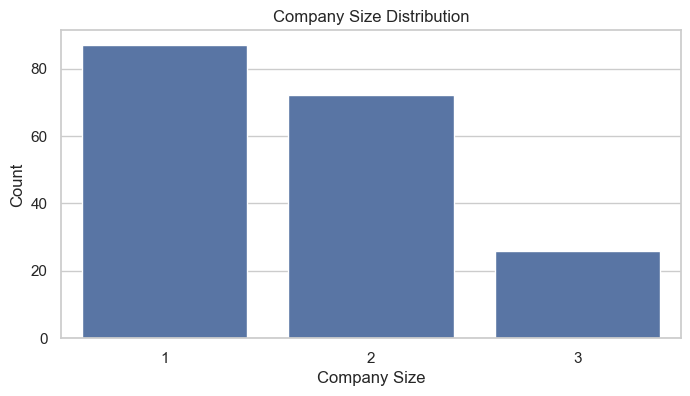

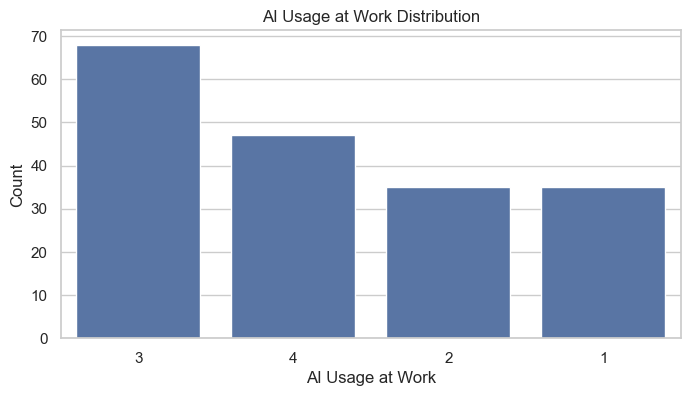

In [33]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot Company Size
plt.figure(figsize=(8, 4))
sns.countplot(data=df_analysis, x='Company_Size', order=df_analysis['Company_Size'].value_counts().index)
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

# Plot AI Usage at Work
plt.figure(figsize=(8, 4))
sns.countplot(data=df_analysis, x='AI_Usage_Work', order=df_analysis['AI_Usage_Work'].value_counts().index)
plt.title('AI Usage at Work Distribution')
plt.xlabel('AI Usage at Work')
plt.ylabel('Count')
plt.show()

### Descriptive statistics 

In [34]:
# Descriptive statistics
descriptive_stats = df_analysis.describe(include='all')
print(descriptive_stats)

       Company_Size  AI_Usage_Work
count    185.000000     185.000000
mean       1.670270       2.686486
std        0.710505       1.052472
min        1.000000       1.000000
25%        1.000000       2.000000
50%        2.000000       3.000000
75%        2.000000       4.000000
max        3.000000       4.000000


In [35]:
# Descriptive statistics for Company Size
company_size_counts = df_analysis['Company_Size'].value_counts()
company_size_percentage = df_analysis['Company_Size'].value_counts(normalize=True) * 100

print("\nCompany Size Counts:")
print(company_size_counts)
print("\nCompany Size Percentages:")
print(company_size_percentage)

# Descriptive statistics for AI Usage at Work
ai_usage_stats = df_analysis['AI_Usage_Work'].describe()  # Summary stats
ai_usage_counts = df_analysis['AI_Usage_Work'].value_counts()

# Calculate the percentage of the total participants for each AI usage category
ai_usage_percentage = df_analysis['AI_Usage_Work'].value_counts(normalize=True) * 100

print("\nAI Usage Descriptive Statistics:")
print(ai_usage_stats)

print("\nAI Usage Counts:")
print(ai_usage_counts)

print("\nAI Usage Percentages:")
print(ai_usage_percentage)



Company Size Counts:
Company_Size
1    87
2    72
3    26
Name: count, dtype: int64

Company Size Percentages:
Company_Size
1    47.027027
2    38.918919
3    14.054054
Name: proportion, dtype: float64

AI Usage Descriptive Statistics:
count    185.000000
mean       2.686486
std        1.052472
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: AI_Usage_Work, dtype: float64

AI Usage Counts:
AI_Usage_Work
3    68
4    47
2    35
1    35
Name: count, dtype: int64

AI Usage Percentages:
AI_Usage_Work
3    36.756757
4    25.405405
2    18.918919
1    18.918919
Name: proportion, dtype: float64


Drop rows containing "I do not know" for company size. The research is based on the employees knowledge of their AI usage and what company size they work in. Without the company size I can't observe relationships between the two variables so dropping them would be best.

perform descriptive statistics for each company size 

In [36]:
# Drop rows with 'I do not know' for analysis
df_analysis = df_analysis[df_analysis['Company_Size'] > 0]

# Descriptive analysis for each company size category
descriptive_stats = df_analysis.groupby('Company_Size')['AI_Usage_Work'].describe()

# Print the descriptive statistics
print("Descriptive Statistics for AI Usage by Company Size:")
print(descriptive_stats)


Descriptive Statistics for AI Usage by Company Size:
              count      mean       std  min  25%  50%   75%  max
Company_Size                                                     
1              87.0  2.620690  1.112732  1.0  2.0  3.0  4.00  4.0
2              72.0  2.805556  0.987797  1.0  2.0  3.0  3.25  4.0
3              26.0  2.576923  1.026570  1.0  2.0  3.0  3.00  4.0


In [37]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

Plot the individual AI usage level per company size 

/var/folders/kz/slhyr0gd4qj4nrryyswvqv4c0000gn/T/ipykernel_16207/1026715057.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('magma', 4)  # Get a color map with 4 colors


<Figure size 1000x600 with 0 Axes>

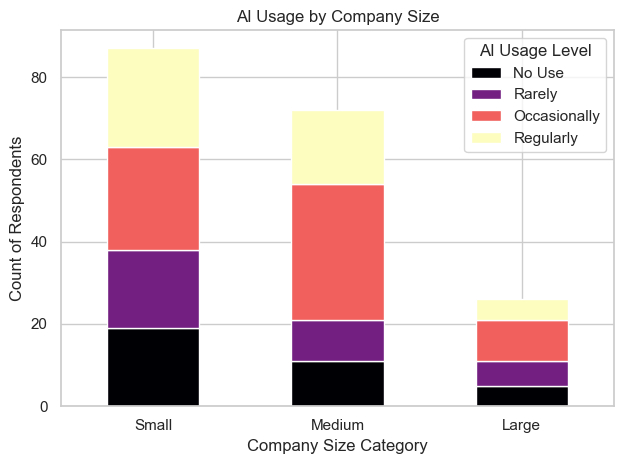

In [38]:

import matplotlib.cm as cm

# Group the data by 'Company_Size' and 'AI_Usage_Work' and count occurrences
usage_counts = df_analysis.groupby(['Company_Size', 'AI_Usage_Work']).size().unstack(fill_value=0)

# Create a figure with a transparent background
plt.figure(figsize=(10, 6), facecolor='none')  # Set figure background to transparent

# Use the built-in 'Oranges' color map
colors = cm.get_cmap('magma', 4)  # Get a color map with 4 colors

# Plotting
usage_counts.plot(kind='bar', stacked=True, color=colors(range(4)))  # Use the color map for bar colors

# Setting plot titles and labels
plt.title('AI Usage by Company Size')
plt.xlabel('Company Size Category')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=0)
plt.legend(title='AI Usage Level', labels=['No Use', 'Rarely', 'Occasionally', 'Regularly'])

# Set x-tick labels directly
plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'])

# Set axes background to transparent
plt.gca().set_facecolor('none')  # Make the axes background transparent
plt.gcf().patch.set_alpha(0.0)  # Set figure patch transparency to 0

plt.tight_layout()
plt.show()

### Inferential statistics 

Performing traditional ANOVA

In [39]:
# Prepare data for ANOVA
small = df_analysis[df_analysis['Company_Size'] == 1]['AI_Usage_Work']
medium = df_analysis[df_analysis['Company_Size'] == 2]['AI_Usage_Work']
large = df_analysis[df_analysis['Company_Size'] == 3]['AI_Usage_Work']

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(small, medium, large)

# Output the results
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in AI usage between company sizes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in AI usage between company sizes.")

ANOVA Results:
F-statistic: 0.7697264411526797
P-value: 0.4646414227995408
Fail to reject the null hypothesis: There is no significant difference in AI usage between company sizes.


Performing Welch's ANOVA.

Since my samples are very skewed, ChatGPT told me that Welch's ANOVA might be a better choice since it doesn't assume that the variance of the groups are equal which provides are more reliable assessment of the differences in AI usage.

In [40]:
# Prepare data for ANOVA
small = df_analysis[df_analysis['Company_Size'] == 1]['AI_Usage_Work']
medium = df_analysis[df_analysis['Company_Size'] == 2]['AI_Usage_Work']
large = df_analysis[df_analysis['Company_Size'] == 3]['AI_Usage_Work']

# Calculate the means and variances
mean_small = np.mean(small)
mean_medium = np.mean(medium)
mean_large = np.mean(large)

var_small = np.var(small, ddof=1)  # Sample variance
var_medium = np.var(medium, ddof=1)
var_large = np.var(large, ddof=1)

n_small = len(small)
n_medium = len(medium)
n_large = len(large)

# Welch's ANOVA calculation
denominator = (var_small / n_small) + (var_medium / n_medium) + (var_large / n_large)

# Perform Welch's ANOVA with a check for sufficient data
if n_small > 1 and n_medium > 1 and n_large > 1:  # Ensuring there's sufficient data
    f_statistic = ((mean_small - mean_medium) ** 2) / denominator
    # Calculate degrees of freedom for Welch's ANOVA
    dfn = 2  # Number of groups - 1
    dfd = (var_small / n_small) ** 2 / (n_small - 1) + (var_medium / n_medium) ** 2 / (n_medium - 1) + (var_large / n_large) ** 2 / (n_large - 1)

    # Calculate the p-value from the F-distribution
    p_value = stats.f.sf(f_statistic, dfn, dfd)

    # Output the results
    print("Welch's ANOVA Results:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in AI usage between company sizes.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in AI usage between company sizes.")
else:
    print("Not enough data for Welch's ANOVA.")


Welch's ANOVA Results:
F-statistic: 0.5002518378311565
P-value: 0.9996623768322187
Fail to reject the null hypothesis: There is no significant difference in AI usage between company sizes.


### Confidence intervals 

In [58]:
import numpy as np
import scipy.stats as stats

# Means and sample sizes for each group
mean_small = np.mean(small)
mean_medium = np.mean(medium)
mean_large = np.mean(large)

std_small = np.std(small, ddof=1)  # Sample standard deviation
std_medium = np.std(medium, ddof=1)
std_large = np.std(large, ddof=1)

n_small = len(small)
n_medium = len(medium)
n_large = len(large)

# Confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate confidence intervals
ci_small = stats.t.interval(confidence_level, n_small - 1, loc=mean_small, scale=std_small / np.sqrt(n_small))
ci_medium = stats.t.interval(confidence_level, n_medium - 1, loc=mean_medium, scale=std_medium / np.sqrt(n_medium))
ci_large = stats.t.interval(confidence_level, n_large - 1, loc=mean_large, scale=std_large / np.sqrt(n_large))

print("Confidence Interval for Small Group Mean:", ci_small)
print("Confidence Interval for Medium Group Mean:", ci_medium)
print("Confidence Interval for Large Group Mean:", ci_large)


Confidence Interval for Small Group Mean: (2.3835343733235104, 2.857844937021317)
Confidence Interval for Medium Group Mean: (2.573434588733797, 3.0376765223773137)
Confidence Interval for Large Group Mean: (2.1622824433662102, 2.991563710479944)


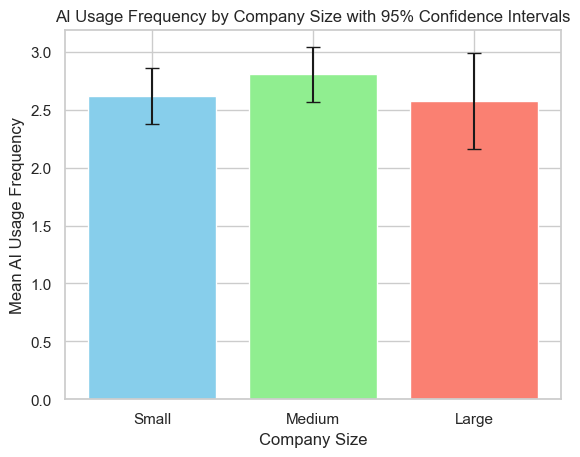

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Define means and confidence intervals for each group
means = [2.62, 2.81, 2.58]  # Replace with actual means for small, medium, large
conf_intervals = [(2.38, 2.86), (2.57, 3.04), (2.16, 2.99)]  # Confidence intervals

# Calculate error bars (distance from mean to upper/lower bounds)
yerr = [[mean - ci[0], ci[1] - mean] for mean, ci in zip(means, conf_intervals)]
yerr = np.array(yerr).T  # Transpose to match the format needed for plt.errorbar

# Plot
fig, ax = plt.subplots()
bars = ax.bar(['Small', 'Medium', 'Large'], means, yerr=yerr, capsize=5, color=['skyblue', 'lightgreen', 'salmon'])
ax.set_title("AI Usage Frequency by Company Size with 95% Confidence Intervals")
ax.set_xlabel("Company Size")
ax.set_ylabel("Mean AI Usage Frequency")
plt.show()


### Power analysis 

In [59]:
from statsmodels.stats.power import FTestAnovaPower

# Define parameters
effect_size = 0.25  # Medium effect size for ANOVA (adjust as per expectations or previous studies)
alpha = 0.05
power = 0.80  # Desired power level
k_groups = 3  # Number of groups (small, medium, large)

# Power analysis for required sample size per group
power_analysis = FTestAnovaPower()
sample_size_needed = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, k_groups=k_groups)

print(f"Required Sample Size per Group for 80% Power: {sample_size_needed}")


Required Sample Size per Group for 80% Power: 157.18939443740587


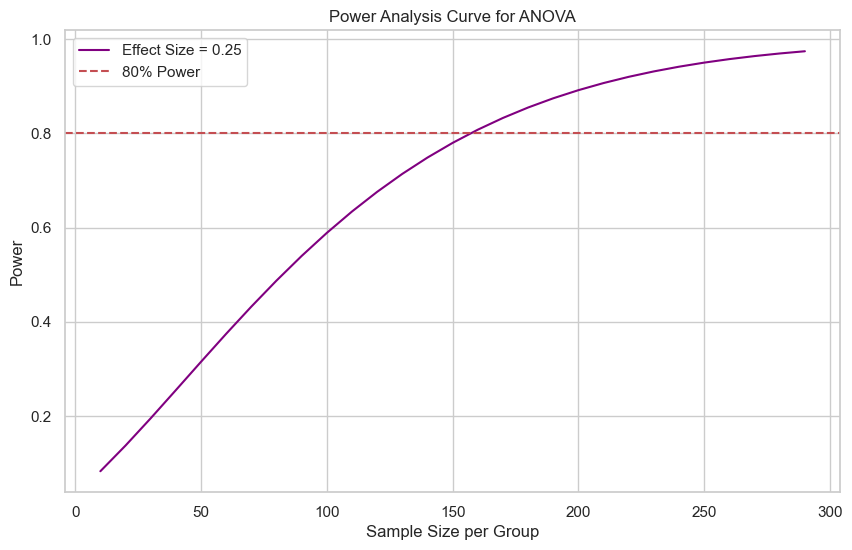

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import FTestAnovaPower

# Parameters
effect_size = 0.25  # Medium effect size
alpha = 0.05
sample_sizes = np.arange(10, 300, 10)  # Range of sample sizes to plot
power_values = [FTestAnovaPower().power(effect_size=effect_size, nobs=n, alpha=alpha, k_groups=3) for n in sample_sizes]

# Plot power curve
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, power_values, label=f'Effect Size = {effect_size}', color='purple')
plt.axhline(y=0.8, color='r', linestyle='--', label="80% Power")
plt.xlabel("Sample Size per Group")
plt.ylabel("Power")
plt.title("Power Analysis Curve for ANOVA")
plt.legend()
plt.show()


Correlation co-efficient 

In [41]:
# Calculate correlation
correlation = df_analysis['Company_Size'].corr(df_analysis['AI_Usage_Work'])

# Print the correlation coefficient
print(f"Correlation between Company Size and AI Usage Work: {correlation:.3f}")

# Interpret the correlation coefficient
if correlation > 0:
    print("There is a positive correlation: as company size increases, AI usage tends to increase.")
elif correlation < 0:
    print("There is a negative correlation: as company size increases, AI usage tends to decrease.")
else:
    print("There is no correlation between company size and AI usage.")


Correlation between Company Size and AI Usage Work: 0.021
There is a positive correlation: as company size increases, AI usage tends to increase.


### Visualizations 

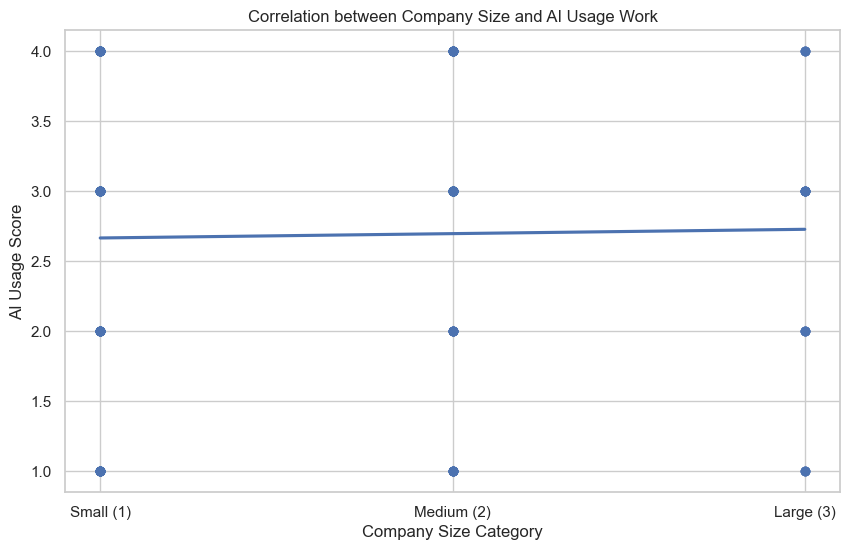

In [42]:
# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Company_Size', y='AI_Usage_Work', data=df_analysis, marker='o', color='b', ci=None)
plt.title('Correlation between Company Size and AI Usage Work')
plt.xlabel('Company Size Category')
plt.ylabel('AI Usage Score')
plt.xticks(ticks=[1, 2, 3], labels=['Small (1)', 'Medium (2)', 'Large (3)'])
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:          AI_Usage_Work   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.07997
Date:                Thu, 31 Oct 2024   Prob (F-statistic):              0.778
Time:                        14:02:16   Log-Likelihood:                -271.42
No. Observations:                 185   AIC:                             546.8
Df Residuals:                     183   BIC:                             553.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.6348      0.199     13.265   

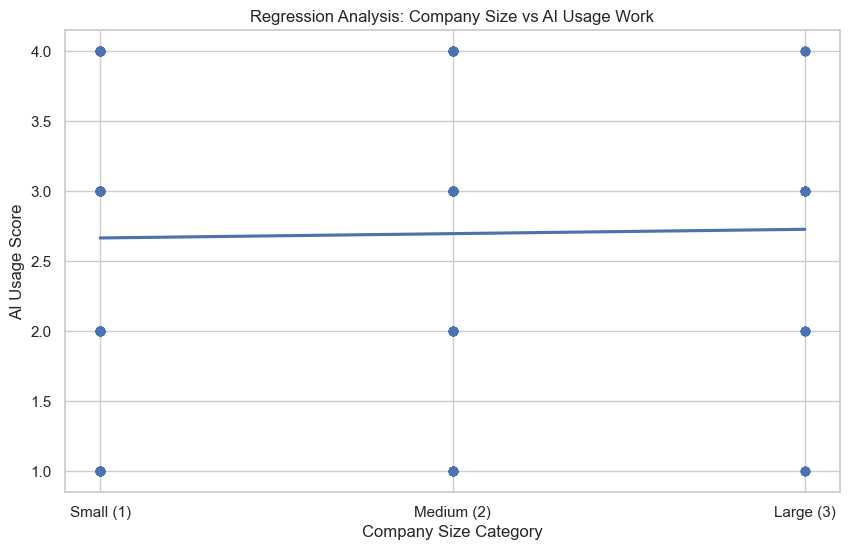

In [43]:
# Define the independent variable (X) and dependent variable (y)
X = df_analysis['Company_Size']
y = df_analysis['AI_Usage_Work']

# Add a constant to the independent variable (required for OLS)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Visualization of the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Company_Size', y='AI_Usage_Work', data=df_analysis, marker='o', color='b', ci=None)
plt.title('Regression Analysis: Company Size vs AI Usage Work')
plt.xlabel('Company Size Category')
plt.ylabel('AI Usage Score')
plt.xticks(ticks=[1, 2, 3], labels=['Small (1)', 'Medium (2)', 'Large (3)'])
plt.grid(True)
plt.show()

/var/folders/kz/slhyr0gd4qj4nrryyswvqv4c0000gn/T/ipykernel_16207/2367532881.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Company_Size', y='AI_Usage_Work', data=mean_ai_usage, palette='viridis', ci='sd')
/var/folders/kz/slhyr0gd4qj4nrryyswvqv4c0000gn/T/ipykernel_16207/2367532881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company_Size', y='AI_Usage_Work', data=mean_ai_usage, palette='viridis', ci='sd')


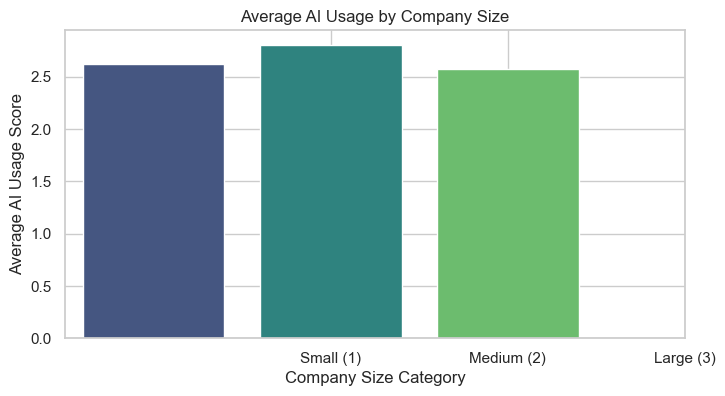

In [44]:
# Calculate the mean AI usage score by company size
mean_ai_usage = df_analysis.groupby('Company_Size')['AI_Usage_Work'].mean().reset_index()

# Bar plot for average AI usage by company size
plt.figure(figsize=(8, 4))
sns.barplot(x='Company_Size', y='AI_Usage_Work', data=mean_ai_usage, palette='viridis', ci='sd')
plt.title('Average AI Usage by Company Size')
plt.xlabel('Company Size Category')
plt.ylabel('Average AI Usage Score')
plt.xticks(ticks=[1, 2, 3], labels=['Small (1)', 'Medium (2)', 'Large (3)'])
plt.grid(True)
plt.show()


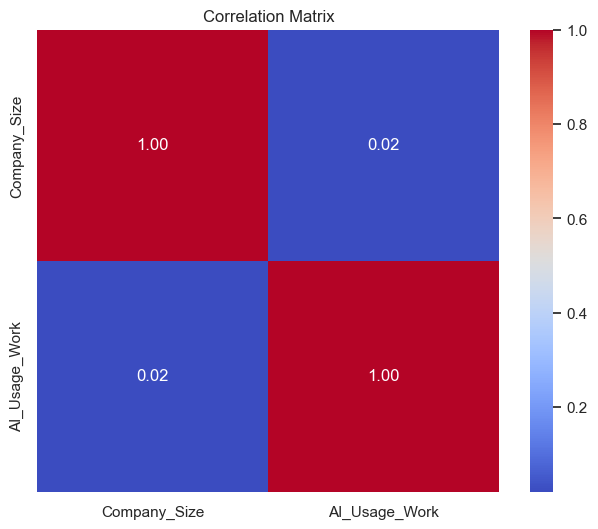

In [45]:
# Calculate correlation matrix
correlation_matrix = df_analysis.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()


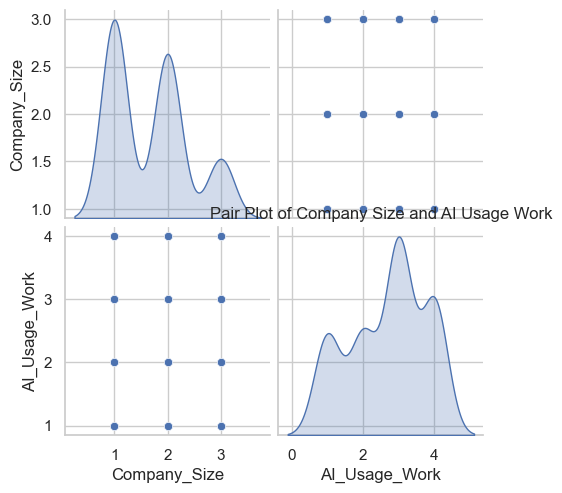

In [46]:
# Pair plot to visualize relationships between variables
sns.pairplot(df_analysis[['Company_Size', 'AI_Usage_Work']], diag_kind='kde')
plt.title('Pair Plot of Company Size and AI Usage Work')
plt.show()


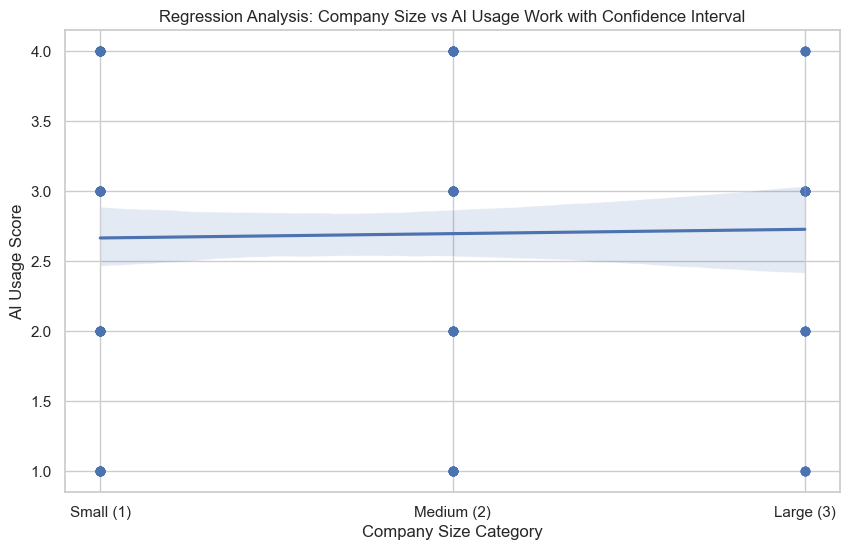

In [47]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Company_Size', y='AI_Usage_Work', data=df_analysis, marker='o', color='b', ci=95)
plt.title('Regression Analysis: Company Size vs AI Usage Work with Confidence Interval')
plt.xlabel('Company Size Category')
plt.ylabel('AI Usage Score')
plt.xticks(ticks=[1, 2, 3], labels=['Small (1)', 'Medium (2)', 'Large (3)'])
plt.grid(True)
plt.show()


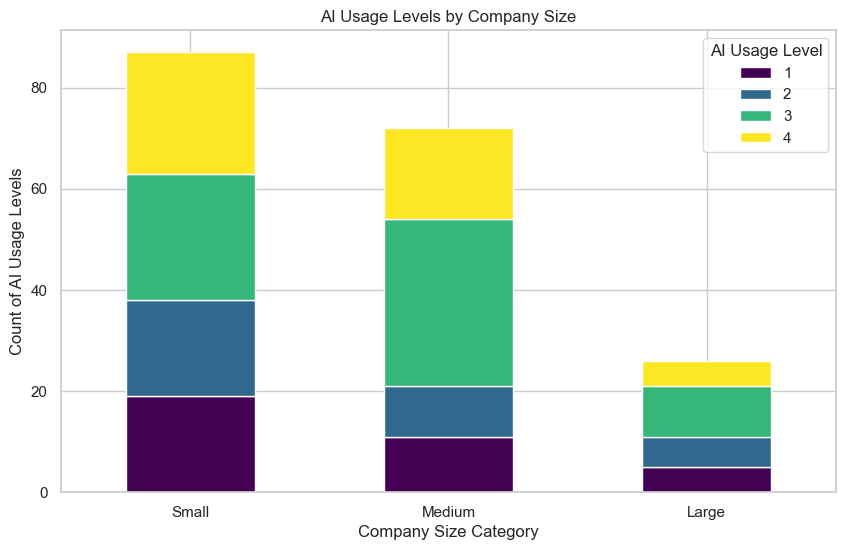

In [48]:
 # Calculate proportions of AI usage levels by company size
usage_proportions = df_analysis.groupby(['Company_Size', 'AI_Usage_Work']).size().unstack()

# Plot stacked bar chart
usage_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('AI Usage Levels by Company Size')
plt.xlabel('Company Size Category')
plt.ylabel('Count of AI Usage Levels')
plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'], rotation=0)
plt.legend(title='AI Usage Level')
plt.show()


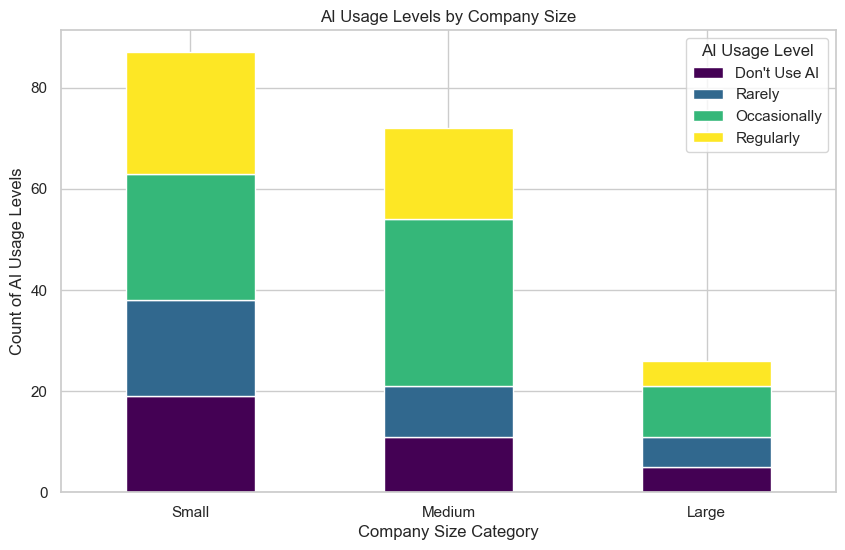

In [49]:
# Calculate proportions of AI usage levels by company size
usage_proportions = df_analysis.groupby(['Company_Size', 'AI_Usage_Work']).size().unstack()

# Plot stacked bar chart
usage_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('AI Usage Levels by Company Size')
plt.xlabel('Company Size Category')
plt.ylabel('Count of AI Usage Levels')
plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'], rotation=0)

# Customizing legend with descriptive labels
plt.legend(
    title='AI Usage Level',
    labels=["Don't Use AI", "Rarely", "Occasionally", "Regularly"]
)

plt.show()


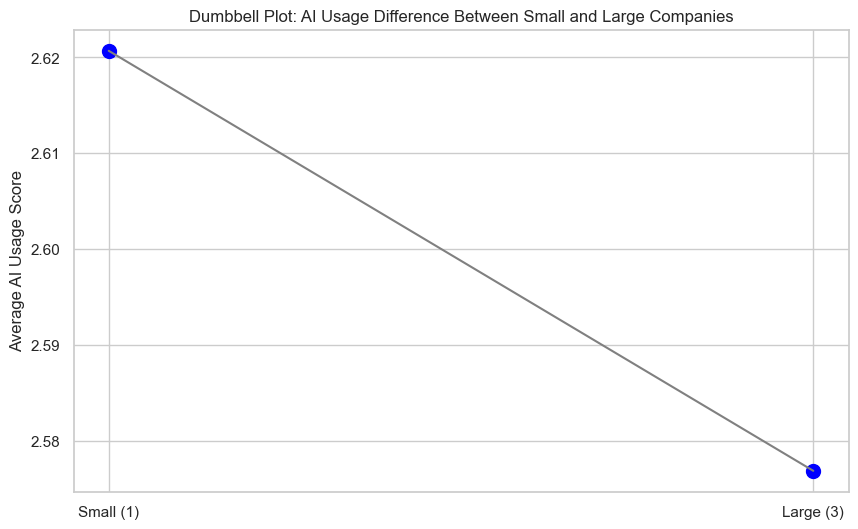

In [50]:
# Prepare data for Small (1) and Large (3) comparison
small_large = df_analysis[df_analysis['Company_Size'].isin([1, 3])].groupby('Company_Size')['AI_Usage_Work'].mean()

# Dumbbell plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter([1, 3], small_large, color='blue', s=100)  # Points for each group
ax.plot([1, 3], small_large, color='gray')  # Line connecting points
ax.set_xticks([1, 3])
ax.set_xticklabels(['Small (1)', 'Large (3)'])
ax.set_title('Dumbbell Plot: AI Usage Difference Between Small and Large Companies')
ax.set_ylabel('Average AI Usage Score')
plt.show()


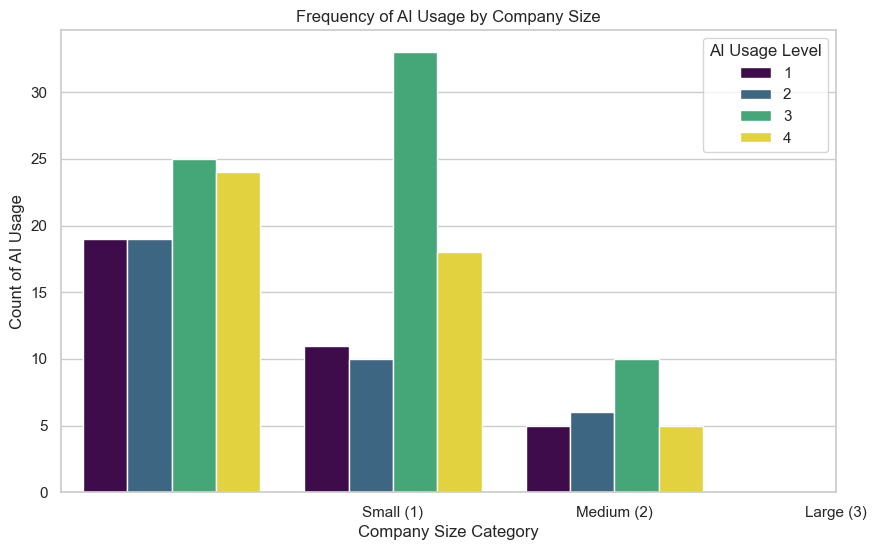

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Company_Size', hue='AI_Usage_Work', data=df_analysis, palette='viridis')
plt.title('Frequency of AI Usage by Company Size')
plt.xlabel('Company Size Category')
plt.ylabel('Count of AI Usage')
plt.xticks(ticks=[1, 2, 3], labels=['Small (1)', 'Medium (2)', 'Large (3)'])
plt.legend(title='AI Usage Level')
plt.show()


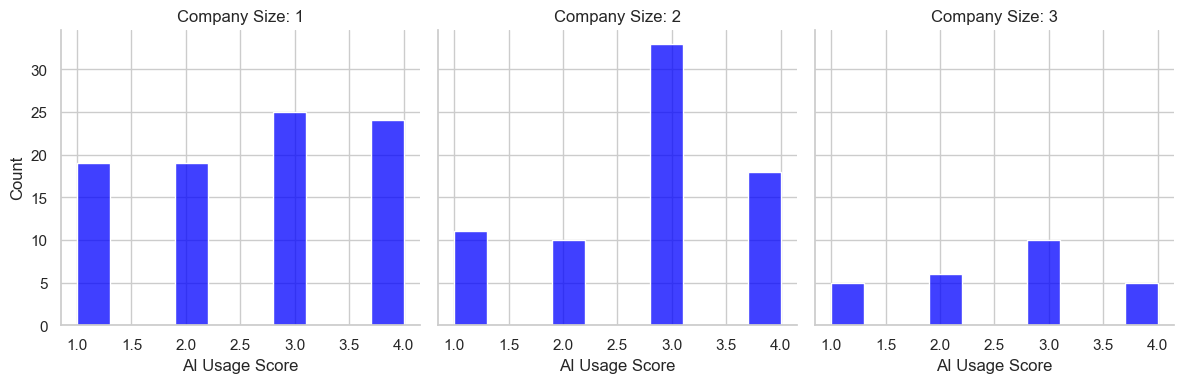

In [52]:
# Create a facet grid of histograms
g = sns.FacetGrid(df_analysis, col="Company_Size", col_wrap=3, height=4)
g.map(sns.histplot, "AI_Usage_Work", color="blue", bins=10)
g.set_titles("Company Size: {col_name}")
g.set_axis_labels("AI Usage Score", "Count")
plt.show()


In [53]:


# Step 1: Count occurrences of each AI tool by company size
tool_counts_by_company_size = df.groupby(['Q30', 'Q9']).size().unstack(fill_value=0)

# Step 2: Display the table for comparison
print("AI Tool Usage by Company Size:")
print(tool_counts_by_company_size)



AI Tool Usage by Company Size:
Q9                       ChatGPT  ChatGPT,DALL·E,MidJourney,Other  \
Q30                                                                 
1 employee                     1                                0   
10-49 employees               20                                0   
101-250 employees              6                                0   
50-100 employees              10                                0   
Fewer than 10 employees        2                                1   
Fewer than 5 employees         3                                0   
I do not know                  0                                0   
More than 250 employees        9                                0   

Q9                       ChatGPT,DALLÂ·E  ChatGPT,DALLÂ·E,Google Bard,Jasper  \
Q30                                                                            
1 employee                             0                                   0   
10-49 employees                       

In [54]:
unique_tools_q9 = df["Q9"].unique()
print("Unique AI tools used in Question 9:")
print(unique_tools_q9)

Unique AI tools used in Question 9:
['DALLÂ·E' 'ChatGPT,Microsoft Copilot' 'None of the above'
 'ChatGPT,DALLÂ·E' 'Microsoft Copilot' 'ChatGPT,OpenAI API'
 'ChatGPT,DALLÂ·E,MidJourney' 'ChatGPT'
 'ChatGPT,DALLÂ·E,Microsoft Copilot'
 'ChatGPT,DALLÂ·E,OpenAI API,Google Bard,Microsoft Copilot'
 'ChatGPT,Google Bard,Microsoft Copilot,Jasper' 'Google Bard'
 'ChatGPT,Google Bard,Microsoft Copilot' nan 'ChatGPT,MidJourney'
 'ChatGPT,Other' 'ChatGPT,DALLÂ·E,OpenAI API,Microsoft Copilot,Jasper'
 'ChatGPT,OpenAI API,MidJourney' 'ChatGPT,OpenAI API,Google Bard'
 'ChatGPT,Google Bard,Other' 'ChatGPT,Google Bard,Jasper'
 'ChatGPT,Google Bard' 'ChatGPT,None of the above'
 'ChatGPT,OpenAI API,Microsoft Copilot' 'ChatGPT,OpenAI API,Other'
 'ChatGPT,Microsoft Copilot,Other' 'Google Bard,Microsoft Copilot' 'Other'
 'ChatGPT,DALLÂ·E,Google Bard,Jasper'
 'ChatGPT,OpenAI API,Google Bard,MidJourney,Microsoft Copilot,Jasper'
 'ChatGPT,DALLÂ·E,Other' 'ChatGPT,Microsoft Copilot,Jasper'
 'ChatGPT,DALLÂ·E,MidJou

In [55]:
unique_tools_q9 = df['Q9'].dropna().unique()

# Split and collect unique tool names
all_tools = set()
for tools in unique_tools_q9:
    split_tools = [tool.strip() for tool in tools.replace('Â', '').split(',')]
    all_tools.update(split_tools)

# Print the distinct AI tools
print("Distinct AI tools used in Question 9:")
for tool in sorted(all_tools):
    print(tool)

Distinct AI tools used in Question 9:
ChatGPT
DALL·E
Google Bard
Hugging Face
Jasper
Microsoft Copilot
MidJourney
None of the above
OpenAI API
Other


AI Tool Usage by Company Size:
Q9                       ChatGPT  DALL·E  Google Bard  Hugging Face  Jasper  \
Q30                                                                           
1 employee                     4       1            0             0       0   
10-49 employees               42       4            8             3       4   
101-250 employees             20       2            4             0       3   
50-100 employees              37       4            9             0       3   
Fewer than 10 employees       15       3            4             0       0   
Fewer than 5 employees         6       1            1             0       0   
I do not know                  3       1            0             0       0   
More than 250 employees       20       1            4             0       0   

Q9                       Microsoft Copilot  MidJourney  None of the above  \
Q30                                                                         
1 employee              

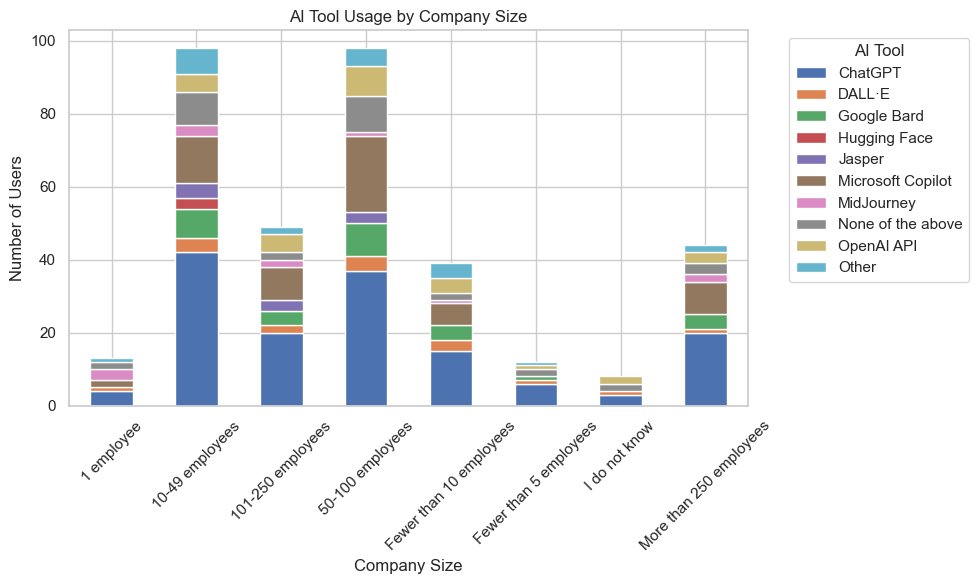

In [56]:
df_expanded = df.dropna(subset=['Q9']).assign(Q9=df['Q9'].str.replace('Â', '').str.split(','))

# Explode the list of tools to create one row per tool
df_expanded = df_expanded.explode('Q9')

# Remove extra spaces around tool names
df_expanded['Q9'] = df_expanded['Q9'].str.strip()

# Step 2: Count each tool usage by company size
tool_usage_by_company_size = df_expanded.groupby(['Q30', 'Q9']).size().unstack(fill_value=0)

# Display the table for comparison
print("AI Tool Usage by Company Size:")
print(tool_usage_by_company_size)

# Optional: Visualization using a bar plot for clearer comparison
import matplotlib.pyplot as plt

tool_usage_by_company_size.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("AI Tool Usage by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Number of Users")
plt.legend(title="AI Tool", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AI Tool Usage by Grouped Company Size:
Q9                  ChatGPT  DALL·E  Google Bard  Hugging Face  Jasper  \
CompanySizeGrouped                                                       
1.0                      67       9           13             3       4   
2.0                      57       6           13             0       6   
3.0                      20       1            4             0       0   

Q9                  Microsoft Copilot  MidJourney  None of the above  \
CompanySizeGrouped                                                     
1.0                                21           7                 15   
2.0                                30           3                 12   
3.0                                 9           2                  3   

Q9                  OpenAI API  Other  
CompanySizeGrouped                     
1.0                         10     13  
2.0                         13      7  
3.0                          3      2  


/var/folders/kz/slhyr0gd4qj4nrryyswvqv4c0000gn/T/ipykernel_16207/4100675558.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Oranges', len(tool_usage_by_company_size.columns))


<Figure size 1200x500 with 0 Axes>

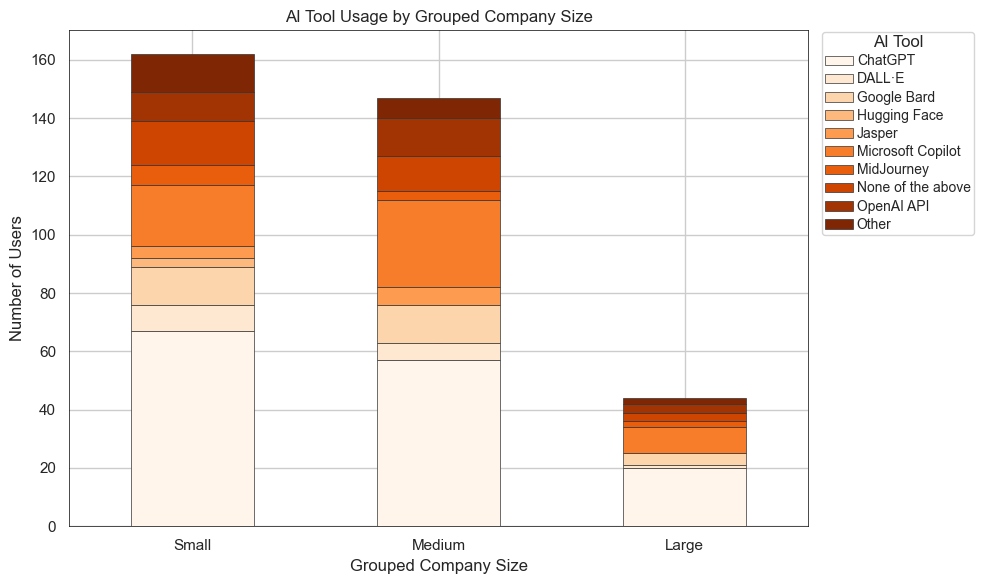

In [57]:
import matplotlib.pyplot as plt

size_mapping = {
    'Fewer than 5 employees': 1,
    'Fewer than 10 employees': 1,
    '10-49 employees': 1,
    '50-100 employees': 2,
    '101-250 employees': 2,
    'More than 250 employees': 3,
    '1 employee': 1,
    'I do not know': 0
}

# Map the company sizes to the broader categories
df['CompanySizeGrouped'] = df['Q30'].map(size_mapping)

# Step 2: Filter out "I do not know" responses and expand the AI tools list
df_filtered = df[~df['Q30'].str.contains("I do not know", na=False) & ~df['Q9'].str.contains("I do not know", na=False)]
df_expanded = df_filtered.dropna(subset=['Q9']).assign(Q9=df['Q9'].str.replace('Â', '').str.split(','))
df_expanded = df_expanded.explode('Q9')
df_expanded['Q9'] = df_expanded['Q9'].str.strip()

# Step 3: Group and count AI tool usage by the new grouped company size
tool_usage_by_company_size = df_expanded.groupby(['CompanySizeGrouped', 'Q9']).size().unstack(fill_value=0)

# Display the table for reference
print("AI Tool Usage by Grouped Company Size:")
print(tool_usage_by_company_size)

# Plot with transparent background and defined borders
plt.figure(figsize=(12, 5), facecolor='none')  # Transparent figure background

# Use 'Oranges' colormap for the stacked bar plot colors
colors = cm.get_cmap('Oranges', len(tool_usage_by_company_size.columns))
tool_usage_by_company_size.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=colors(range(len(tool_usage_by_company_size.columns))),
    edgecolor='#333333',  # Set edge color to make sections more defined
    linewidth=0.5  # Adjust line width for clarity
)

# Plot title and labels
plt.title("AI Tool Usage by Grouped Company Size")
plt.xlabel("Grouped Company Size")
plt.ylabel("Number of Users")
plt.legend(
    title="AI Tool", 
    bbox_to_anchor=(1.01, 1.01), 
    loc='upper left', 
    fontsize='small', 
    title_fontsize='medium', 
    markerscale=0.75, 
    borderpad=0.2,        # Smaller border padding
    handletextpad=0.3,    # Smaller padding between marker and text
    labelspacing=0.3       # Smaller spacing between labels
)


plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'], rotation=0)

plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(0.5)  
plt.gca().spines['right'].set_color('black')
plt.gca().spines['right'].set_linewidth(0.5)  
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(0.5)  
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(0.5) 
# Set plot background to transparent
plt.gca().set_facecolor('none')  # Axes background transparent
plt.gcf().patch.set_alpha(0.0)  # Full figure background transparency

plt.tight_layout()
plt.show()
